# DLthon - 길찾는 오리들
## Base Settings

In [7]:
# importing the libraries
import keras
from keras import layers

keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

In [8]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_split_datasets(
    "data/data_original",
    batch_size=128)

Found 900 files belonging to 6 classes.
Found 39 files belonging to 6 classes.
Found 40 files belonging to 6 classes.


In [12]:
# designing the model
def eV2L_midsize3(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs) # image preprocessing
    x = models_base.EV2L((224, 224, 3))(x, training=False) # pre-trained model
    x = models_top.midsize3()(x) # top model
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                   metrics=['accuracy', 'f1_score'])
    
    return model

eV2L_midsize3().summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_10 (Cast)                  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_midsize3 (Functional)     │ (None, 256)            │     1,837,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,586,221 (456.19 MB)

 Trainable params: 1,839,366 (7.02 MB)

 Non-trainable params: 117,746,855 (449.17 MB)

In [10]:
# training the model
eV2L_midsize3_history = eV2L_midsize3().fit(
    train_dataset.cache(),
    validation_data=val_dataset.cache(),
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_midsize3.keras'),
        utils.callback_earlystop(30)
    ],
)

Epoch 1/200


I0000 00:00:1737450212.591255  773584 service.cc:148] XLA service 0x7fb3f800a930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737450212.591293  773584 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-01-21 18:03:33.896157: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737450249.864386  773584 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2110 - f1_score: 0.1721 - loss: 1.7753   

2025-01-21 18:04:47.056082: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9454', 40 bytes spill stores, 40 bytes spill loads

2025-01-21 18:04:47.367298: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9476', 8 bytes spill stores, 8 bytes spill loads

2025-01-21 18:04:47.480120: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9461', 16 bytes spill stores, 16 bytes spill loads

2025-01-21 18:04:47.580043: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9491', 8 bytes spill stores, 8 bytes spill loads

2025-01-21 18:04:47.591377: I external/local_xla/xla/stream_exec

8/8 ━━━━━━━━━━━━━━━━━━━━ 107s 7s/step - accuracy: 0.2148 - f1_score: 0.1788 - loss: 1.7729 - val_accuracy: 0.2051 - val_f1_score: 0.1176 - val_loss: 1.7079
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.3665 - f1_score: 0.3209 - loss: 1.6715 - val_accuracy: 0.3333 - val_f1_score: 0.2288 - val_loss: 1.6388
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.4177 - f1_score: 0.3686 - loss: 1.5981 - val_accuracy: 0.3333 - val_f1_score: 0.2303 - val_loss: 1.5868
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.4693 - f1_score: 0.4356 - loss: 1.5228 - val_accuracy: 0.3333 - val_f1_score: 0.2337 - val_loss: 1.5038
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 554ms/step - accuracy: 0.5308 - f1_score: 0.5070 - loss: 1.4472 - val_accuracy: 0.3846 - val_f1_score: 0.3212 - val_loss: 1.4432
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.5836 - f1_score: 0.5587 - loss: 1.3331 - val_accuracy: 0.4359 - val_f1_score: 0.3730 - val_loss: 1.4008

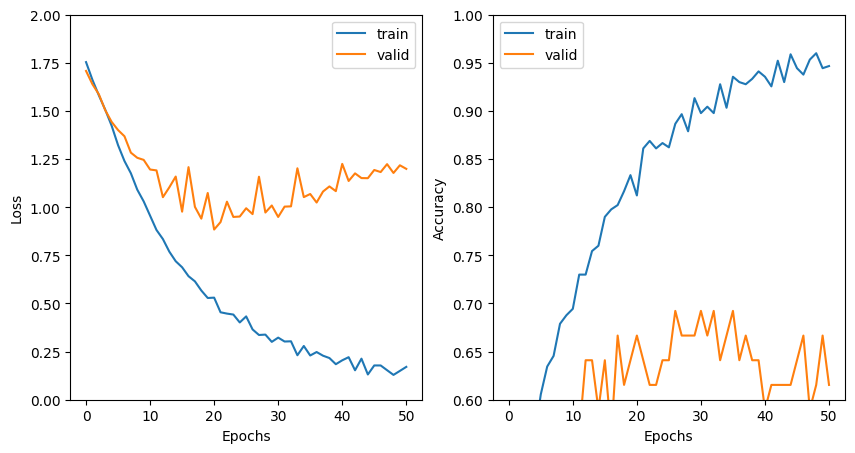

In [11]:
# visualizing the training process
utils.plot_history(eV2L_midsize3_history, loss_ylim=(0, 2), acc_ylim=(0.6, 1))

In [8]:
# evaluating the model
test_loss, test_acc = keras.models.load_model('eV2L_midsize3.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.7619 - loss: 0.7395
Test accuracy: 0.76%, Test loss: 0.74
